In [3]:
from EXP1whiteblackground import clean_experiment_data, calculate_row_mlae, plot_mlae_heatmap, average_mlae_and_visualize, plot_vectorized_predictions_scatter, display_images_combined_by_degree, generate_images_for_multiple_angles

I converted from svg to pdf as input for pretrained models as they won't take svg as an input.

### Generate 10 images with 10 angle degrees with aliased, anti-aliasied, and vectorized images.

In [ ]:
generate_images_for_multiple_angles(canvas_size=100, line_length=30, num_angles=10)

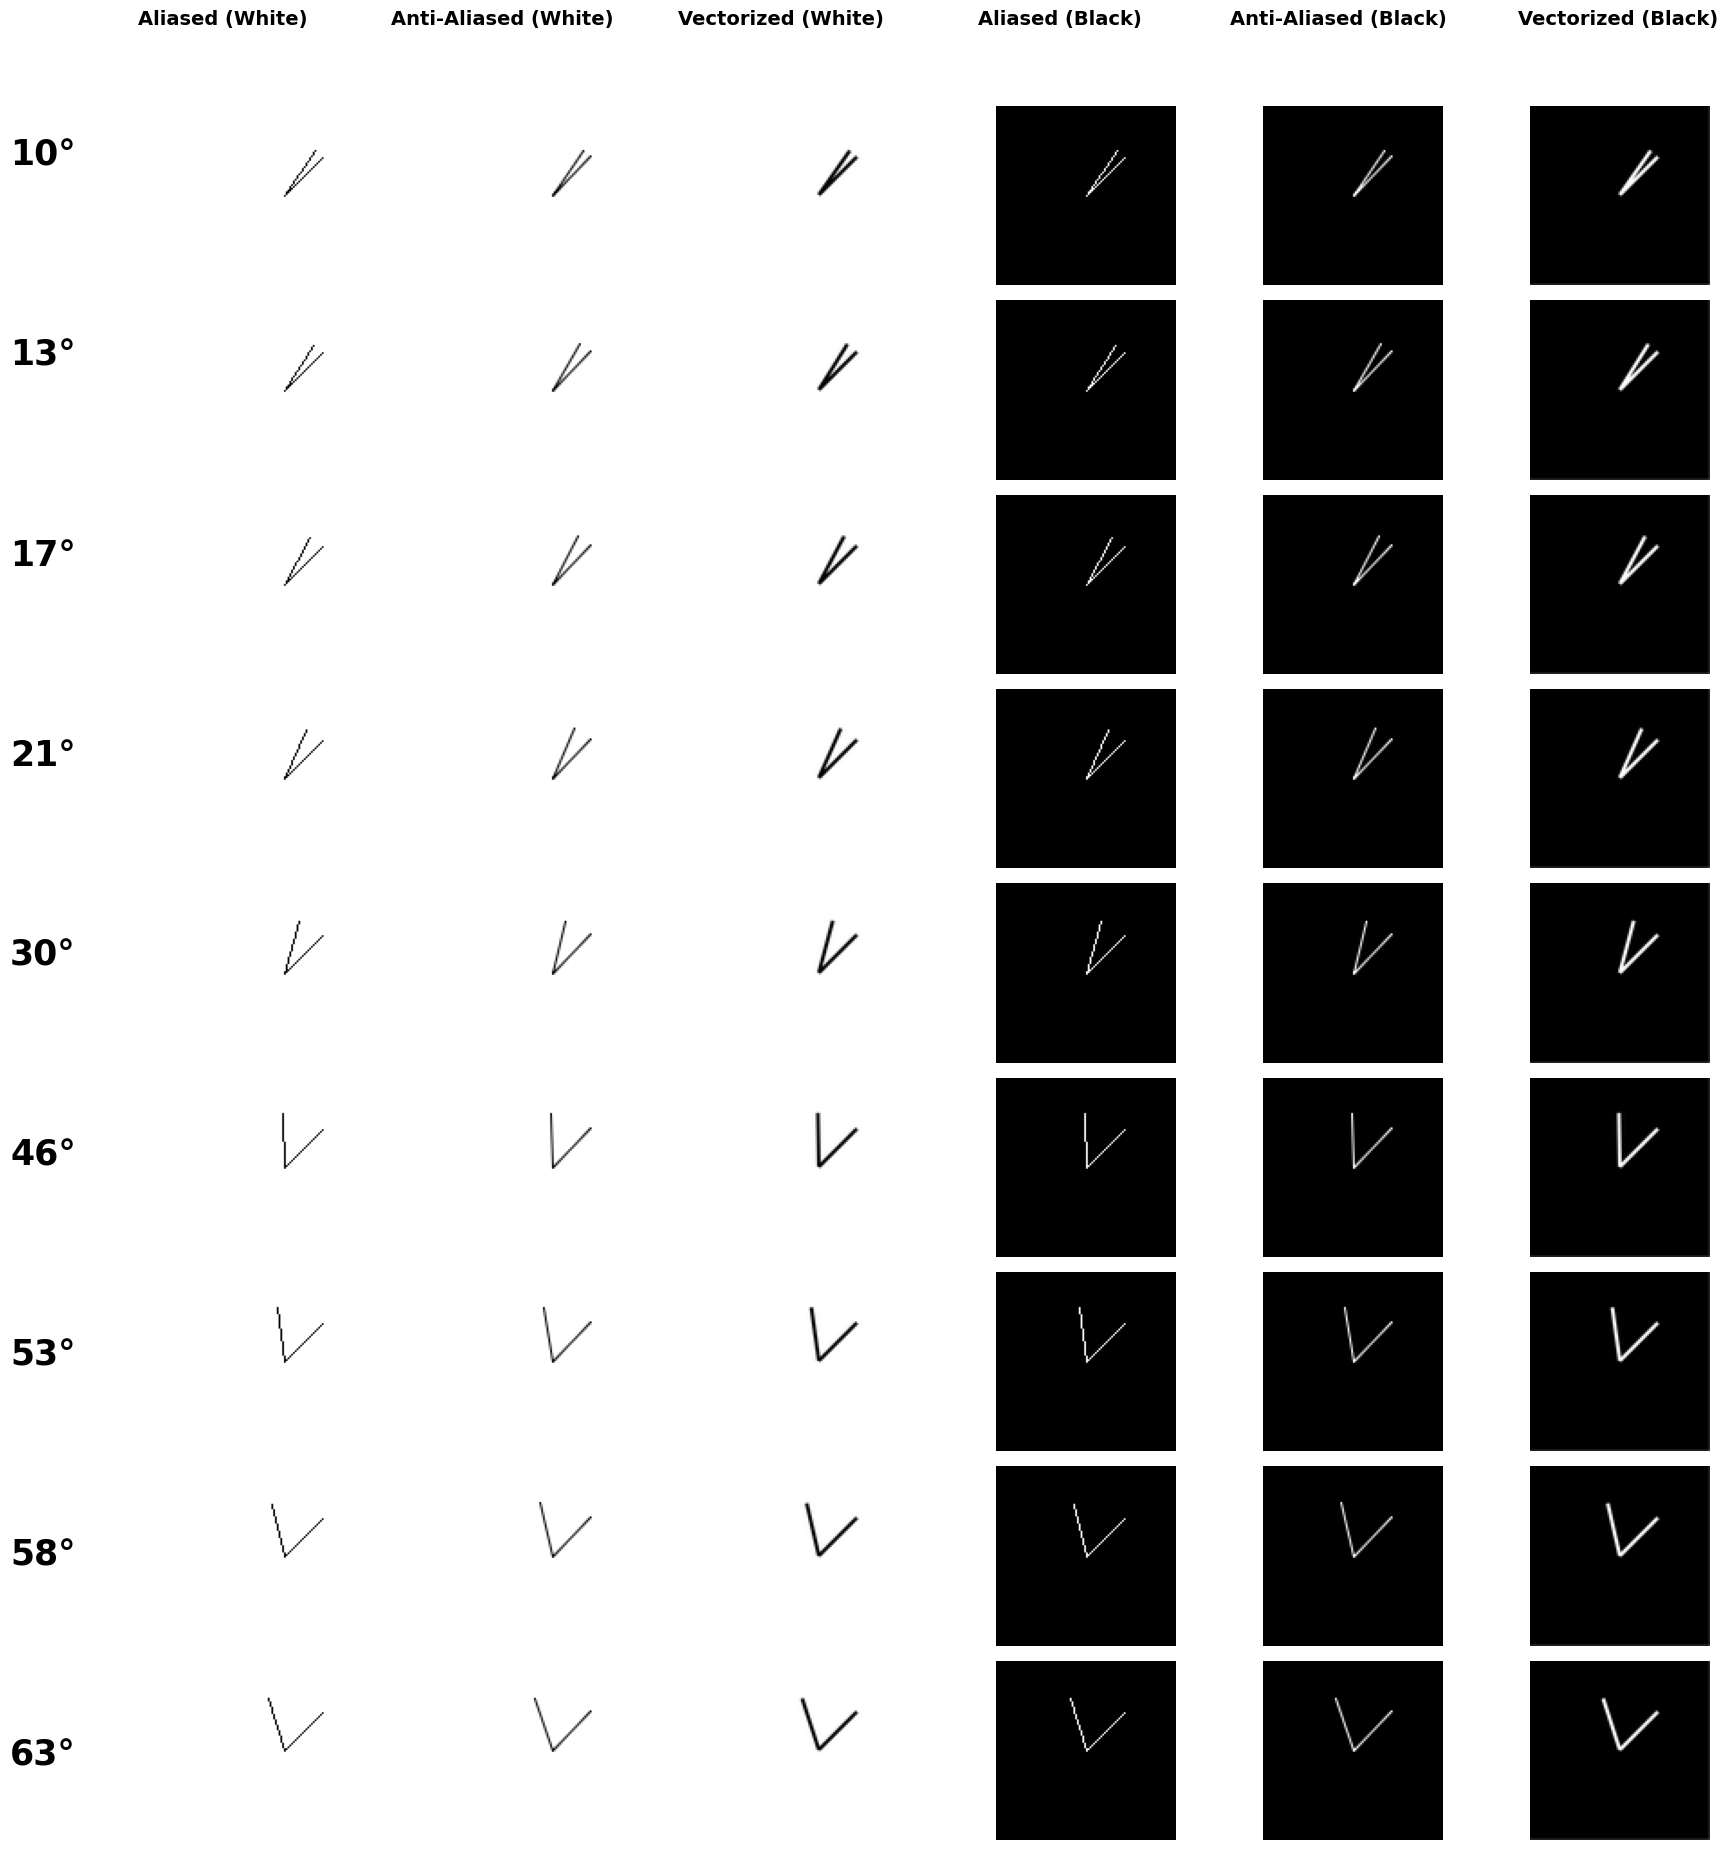

In [5]:
display_images_combined_by_degree("./generated_images")

### Run experiments

In [ ]:
# Add LLMP path
from EXP1whiteblackground import generate_images_for_multiple_angles, display_images_combined_by_degree, Runexp1, prepare_image_data
import LLMP as L

image_dir = "./generated_images"

# Prepare image data
data = prepare_image_data(image_dir)

# Define model instances
model_instances = {
    "gpt4o": L.GPTModel("gpt-4o"),
    #"LLaMA": L.llama("meta-llama/Llama-3.2-11B-Vision-Instruct"),
    "GeminiProVision": L.GeminiProVision(),
    "Gemini1_5Flash": L.Gemini1_5Flash()
}
# Create Runexp1 instance and run the experiment
experiment = Runexp1()
experiment.run_angle_experiment(data=data, model_instances=model_instances)

- I won't include Llama model for this experiment as my CUDA has errors now. I already scheduled with Leo to fix this problem next Monday. I might share with you later next week.

In [7]:
from EXP1whiteblackground import clean_experiment_data, calculate_mlae, calculate_row_mlae, plot_mlae_heatmap

df = clean_experiment_data("angle_results.csv")

In [18]:
# Apply MLAE calculation row-wise
df['MLAE'] = df.apply(calculate_row_mlae, axis=1)

df.head()

file_name  ground_truth            model  prediction  \
0  antialiased_image_white_58.png            58            gpt4o          45   
1  antialiased_image_white_58.png            58  GeminiProVision          30   
2  antialiased_image_white_58.png            58   Gemini1_5Flash          45   
3      aliased_image_black_13.png            13            gpt4o          30   
4      aliased_image_black_13.png            13  GeminiProVision          45   

       MLAE   image_type  
0  3.714246  antialiased  
1  4.813781  antialiased  
2  3.714246  antialiased  
3  4.098032      aliased  
4  5.005625      aliased

- I group the data by image type and model, then calculates the average MLAE, and visualize it by using bar chart.

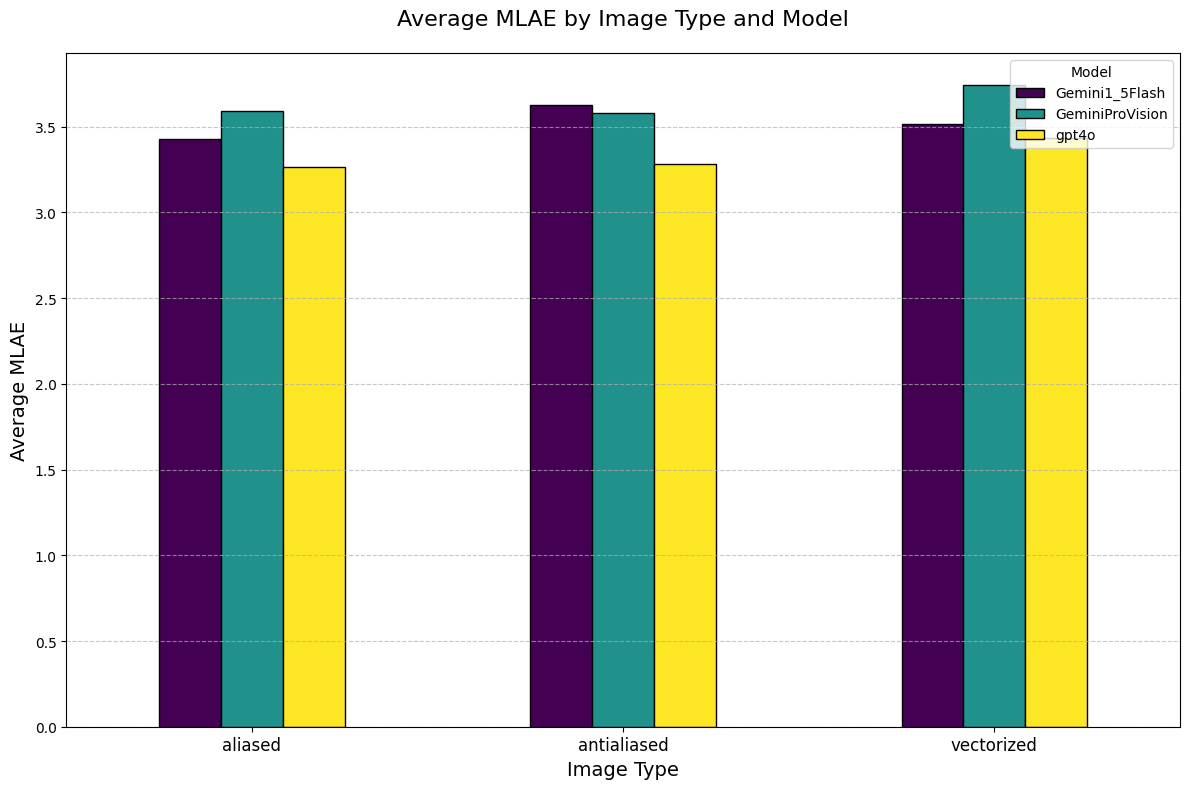

In [12]:
# Example usage
average_mlae_and_visualize(df)



- I also saw the differences in MLAE between the models are relatively small for each type of image in this chart.

- I plotted a scatter plot below in order to visualize prediction and ground truth for vectorized images.

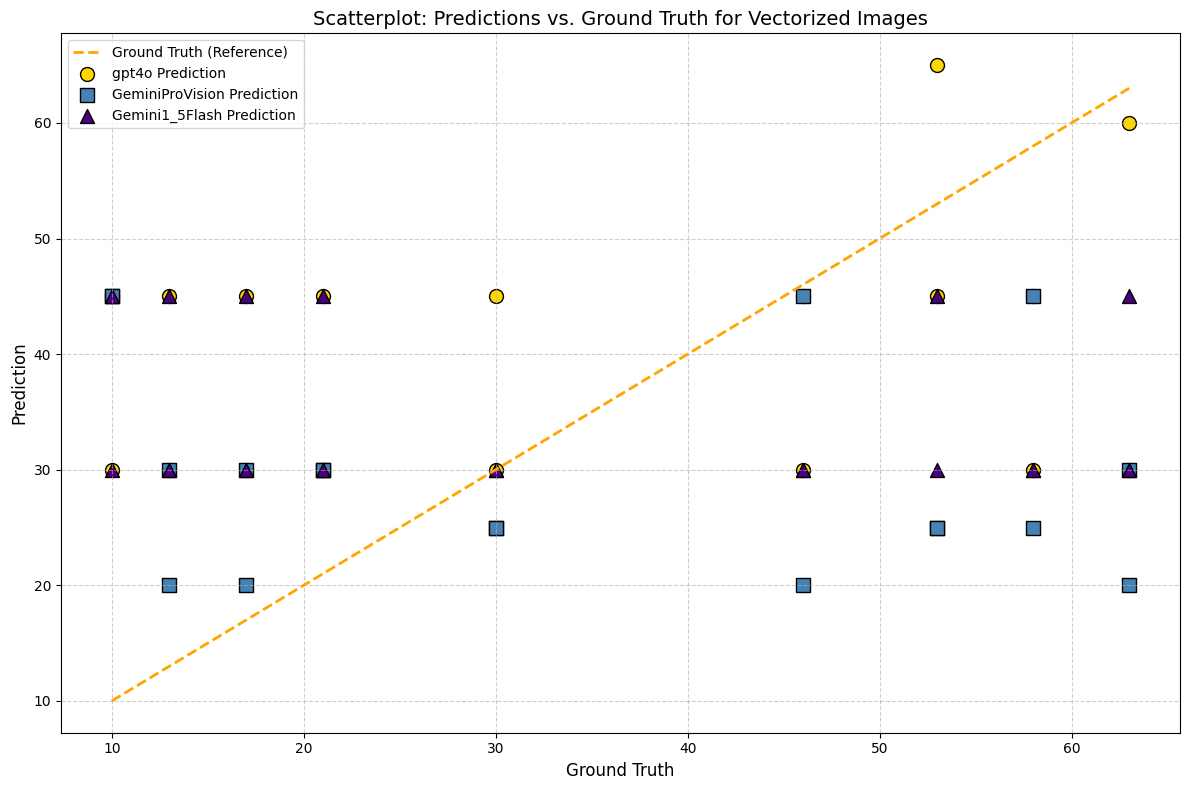

In [15]:
plot_vectorized_predictions_scatter(df)

- Only few predictions near the ground truth. The prediction answers has repetive value like 20, 30, 45 across all models and images.

In [19]:
df

file_name  ground_truth            model  \
0    antialiased_image_white_58.png            58            gpt4o   
1    antialiased_image_white_58.png            58  GeminiProVision   
2    antialiased_image_white_58.png            58   Gemini1_5Flash   
3        aliased_image_black_13.png            13            gpt4o   
4        aliased_image_black_13.png            13  GeminiProVision   
5        aliased_image_black_13.png            13   Gemini1_5Flash   
6     vectorized_image_black_63.pdf            63            gpt4o   
7     vectorized_image_black_63.pdf            63  GeminiProVision   
8     vectorized_image_black_63.pdf            63   Gemini1_5Flash   
9        aliased_image_white_46.png            46            gpt4o   
10       aliased_image_white_46.png            46  GeminiProVision   
11       aliased_image_white_46.png            46   Gemini1_5Flash   
12       aliased_image_black_53.png            53            gpt4o   
13       aliased_image_black_53.png            53  GeminiProVision   
14       aliased_image_black_53.png            53   Gemini1_5Flash   
15   antialiased_image_white_63.png            63            gpt4o   
16   antialiased_image_white_63.png            63  GeminiProVision   
17   antialiased_image_white_63.png            63   Gemini1_5Flash   
18    vectorized_image_black_58.pdf            58            gpt4o   
19    vectorized_image_black_58.pdf            58  GeminiProVision   
20    vectorized_image_black_58.pdf            58   Gemini1_5Flash   
21       aliased_image_black_21.png            21            gpt4o   
22       aliased_image_black_21.png            21  GeminiProVision   
23       aliased_image_black_21.png            21   Gemini1_5Flash   
24       aliased_image_white_10.png            10            gpt4o   
25       aliased_image_white_10.png            10  GeminiProVision   
26       aliased_image_white_10.png            10   Gemini1_5Flash   
27       aliased_image_black_30.png            30            gpt4o   
28       aliased_image_black_30.png            30  GeminiProVision   
29       aliased_image_black_30.png            30   Gemini1_5Flash   
30       aliased_image_white_17.png            17            gpt4o   
31       aliased_image_white_17.png            17  GeminiProVision   
32       aliased_image_white_17.png            17   Gemini1_5Flash   
33   antialiased_image_white_10.png            10            gpt4o   
34   antialiased_image_white_10.png            10  GeminiProVision   
35   antialiased_image_white_10.png            10   Gemini1_5Flash   
36   antialiased_image_black_30.png            30            gpt4o   
37   antialiased_image_black_30.png            30  GeminiProVision   
38   antialiased_image_black_30.png            30   Gemini1_5Flash   
39   antialiased_image_white_17.png            17            gpt4o   
40   antialiased_image_white_17.png            17  GeminiProVision   
41   antialiased_image_white_17.png            17   Gemini1_5Flash   
42    vectorized_image_black_17.pdf            17            gpt4o   
43    vectorized_image_black_17.pdf            17  GeminiProVision   
44    vectorized_image_black_17.pdf            17   Gemini1_5Flash   
45    vectorized_image_white_30.pdf            30            gpt4o   
46    vectorized_image_white_30.pdf            30  GeminiProVision   
47    vectorized_image_white_30.pdf            30   Gemini1_5Flash   
48    vectorized_image_black_10.pdf            10            gpt4o   
49    vectorized_image_black_10.pdf            10  GeminiProVision   
50    vectorized_image_black_10.pdf            10   Gemini1_5Flash   
51    vectorized_image_white_21.pdf            21            gpt4o   
52    vectorized_image_white_21.pdf            21  GeminiProVision   
53    vectorized_image_white_21.pdf            21   Gemini1_5Flash   
54       aliased_image_white_58.png            58            gpt4o   
55       aliased_image_white_58.png            58  GeminiProVision   
56       aliased_image_white_58.png 